### Importing All Required Librearies

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()  # for plot styling
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12, 6)
import os

### Load Dataset

In [5]:
os.chdir('C:\\Users\\HP\\Data SCI FOLDER')
df = pd.read_csv('driver-data.csv')
df.head()

,id,mean_dist_day,mean_over_speed_perc
0,3423311935,71.24,28
1,3423313212,52.53,25
2,3423313724,64.54,27
3,3423311373,55.69,22
4,3423310999,54.58,25


### Data Checking

In [6]:
print (df.info())
print ('\n')
print (df.describe())
print ('\n')
print (df.count())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    4000 non-null   int64  
 1   mean_dist_day         4000 non-null   float64
 2   mean_over_speed_perc  4000 non-null   int64  
dtypes: float64(1), int64(2)
memory usage: 93.9 KB
None


                 id  mean_dist_day  mean_over_speed_perc
count  4.000000e+03    4000.000000           4000.000000
mean   3.423312e+09      76.041523             10.721000
std    1.154845e+03      53.469563             13.708543
min    3.423310e+09      15.520000              0.000000
25%    3.423311e+09      45.247500              4.000000
50%    3.423312e+09      53.330000              6.000000
75%    3.423313e+09      65.632500              9.000000
max    3.423314e+09     244.790000            100.000000


id                      4000
mean_dist_day           4000
mean_ove

### Checking Null Values

In [7]:
print (df.isnull().sum())

id                      0
mean_dist_day           0
mean_over_speed_perc    0
dtype: int64


In [8]:
print (df.notnull().sum())

id                      4000
mean_dist_day           4000
mean_over_speed_perc    4000
dtype: int64


### Ckecking Record Count

In [9]:
print ( "Shape of Data:" , df.shape)

Shape of Data: (4000, 3)


### Create Independent Variable 

In [10]:
x = df.iloc[:,[1,2]].values
x

array([[ 71.24,  28.  ],
       [ 52.53,  25.  ],
       [ 64.54,  27.  ],
       ...,
       [170.91,  12.  ],
       [176.14,   5.  ],
       [168.03,   9.  ]])

### Elbow Methon

In [11]:
from sklearn.cluster import KMeans 
wcss = []
for i in range(1,11):
    kmeans = KMeans (n_clusters =  i , init = 'k-means++')
    kmeans.fit(x)
    wcss.append (kmeans.inertia_)
wcss

[12184626.129627978,
 1316420.850947719,
 992634.0606702475,
 719601.10969919,
 534639.2167980459,
 372841.02901793283,
 319748.07431274117,
 276920.3131040122,
 252685.3505151002,
 230557.17804677048]

### Elbow Graph

Text(0, 0.5, 'wcss')

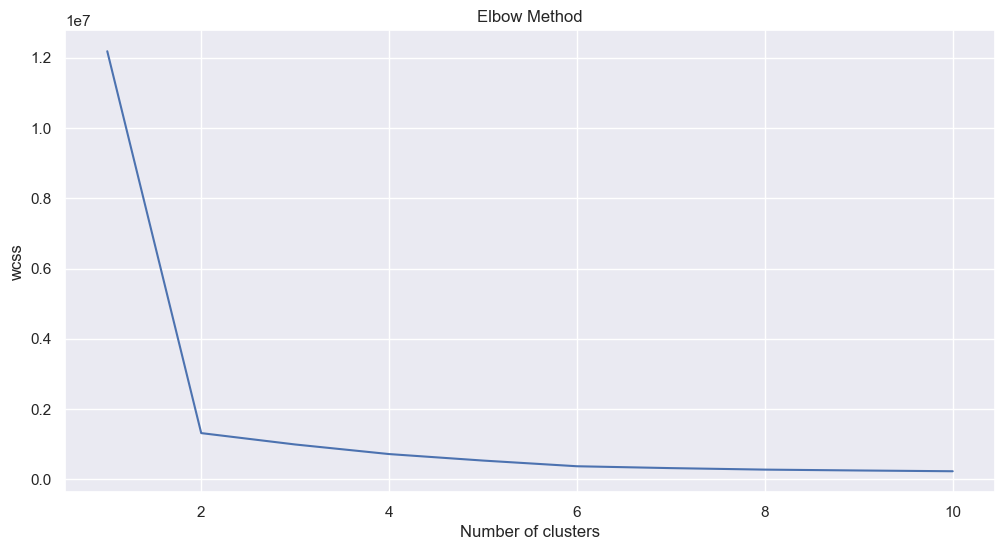

In [12]:
plt.plot (range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel ('wcss')

### Model with two clusters 

In [13]:
kmeans = KMeans(n_clusters=2)
df_analyze = df.drop('id',axis=1)
kmeans.fit(df_analyze)

KMeans(n_clusters=2)

### Cluster Central Points

In [14]:
kmeans.cluster_centers_

array([[ 50.04763438,   8.82875   ],
       [180.017075  ,  18.29      ]])

In [15]:
print (kmeans.labels_)
print (len(kmeans.labels_))

[0 0 0 ... 1 1 1]
4000


### Record Count By Cluster

In [16]:
print (type(kmeans.labels_))
unique, counts = np.unique(kmeans.labels_, return_counts=True)
print(dict(zip(unique, counts)))

<class 'numpy.ndarray'>
{0: 3200, 1: 800}


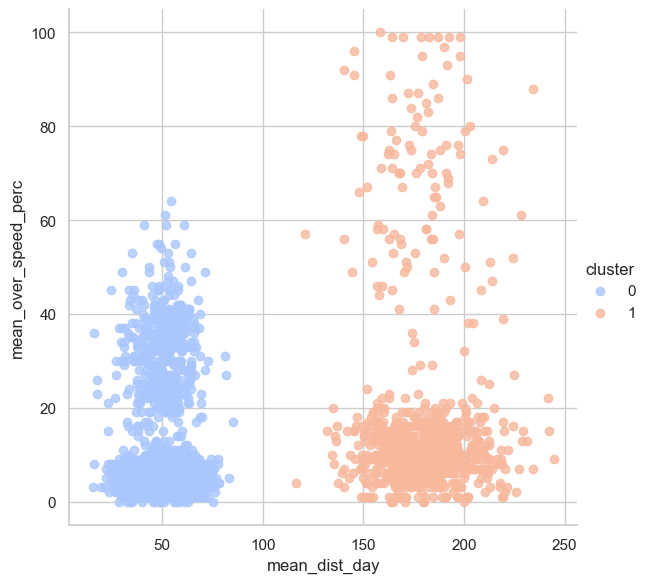

In [17]:
df_analyze['cluster'] = kmeans.labels_
sns.set_style('whitegrid')
sns.lmplot('mean_dist_day','mean_over_speed_perc',data=df_analyze, hue='cluster',
           palette='coolwarm',size=6,aspect=1,fit_reg=False)

In [18]:
Final = pd.concat([df,pd.DataFrame(kmeans.labels_, columns = ['Cluster'])],axis =1)
Final.to_excel("C:\\Users\\HP\\Data SCI FOLDER\\driver-data_2_Cluster.xlsx")
Final

,id,mean_dist_day,mean_over_speed_perc,Cluster
0,3423311935,71.24,28,0
1,3423313212,52.53,25,0
2,3423313724,64.54,27,0
3,3423311373,55.69,22,0
4,3423310999,54.58,25,0
...,...,...,...,...
3995,3423310685,160.04,10,1
3996,3423312600,176.17,5,1
3997,3423312921,170.91,12,1
3998,3423313630,176.14,5,1


### Create Model With 4 Cluster

In [19]:
kmeans =  KMeans (n_clusters =  4 , init = 'k-means++')
kmeans = kmeans.fit(x)
y_kmeans = kmeans.predict(x)
y_kmeans

array([0, 0, 0, ..., 1, 1, 1])

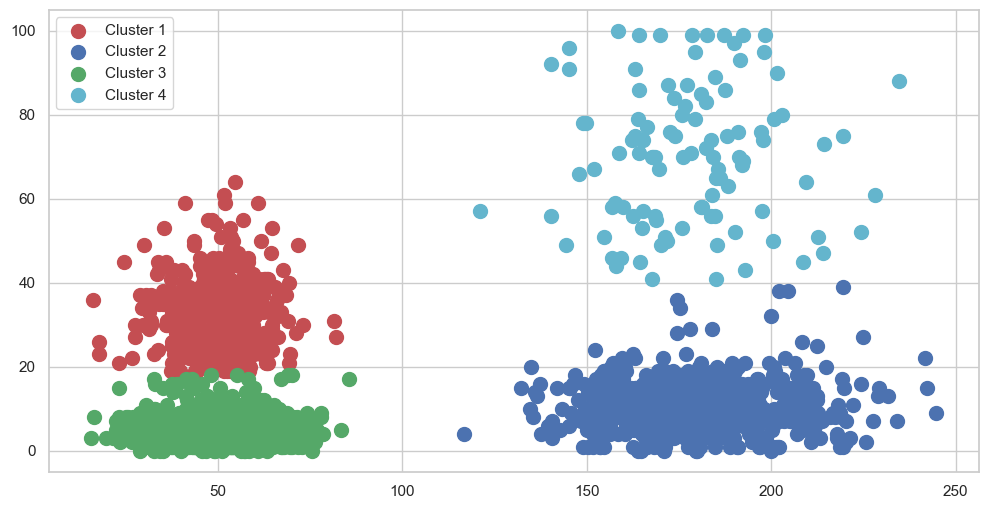

In [20]:
plt.scatter (x[y_kmeans == 0,0],x[y_kmeans == 0,1] ,s = 100, c='r', label = 'Cluster 1')
plt.scatter (x[y_kmeans == 1,0],x[y_kmeans == 1,1] ,s = 100, c='b', label = 'Cluster 2')
plt.scatter (x[y_kmeans == 2,0],x[y_kmeans == 2,1] ,s = 100, c='g', label = 'Cluster 3')
plt.scatter (x[y_kmeans == 3,0],x[y_kmeans == 3,1] ,s = 100, c='c', label = 'Cluster 4')
plt.legend()

In [21]:
Final = pd.concat([df,pd.DataFrame(y_kmeans, columns = ['Cluster'])],axis =1)
Final.to_excel("C:\\Users\\HP\\Data SCI FOLDER\\driver-data_4_Cluster.xlsx")
Final

,id,mean_dist_day,mean_over_speed_perc,Cluster
0,3423311935,71.24,28,0
1,3423313212,52.53,25,0
2,3423313724,64.54,27,0
3,3423311373,55.69,22,0
4,3423310999,54.58,25,0
...,...,...,...,...
3995,3423310685,160.04,10,1
3996,3423312600,176.17,5,1
3997,3423312921,170.91,12,1
3998,3423313630,176.14,5,1
